# Лекция 3: Библиотеки для глубинного обучения. Примитивы фреймворка Pytorch. 

#        Пример обучения нейронной сети в numpy

In [13]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

(0, 27995002.67437835)
(1, 22228675.518465489)
(2, 21714283.823469646)
(3, 22908688.491549183)
(4, 23362235.031218629)
(5, 21363166.852645718)
(6, 16926901.799260754)
(7, 11584825.669895232)
(8, 7125978.1787249167)
(9, 4171971.9430115735)
(10, 2468529.6751479935)
(11, 1541214.854339764)
(12, 1038647.9542371773)
(13, 755873.68231783807)
(14, 585717.72641842207)
(15, 474793.43632193777)
(16, 396619.67357064388)
(17, 337836.1917744138)
(18, 291512.93077149591)
(19, 253735.54033896426)
(20, 222265.13763379608)
(21, 195648.47121849319)
(22, 172895.8264862065)
(23, 153278.56102519386)
(24, 136308.39512208514)
(25, 121549.73201879718)
(26, 108657.34338021145)
(27, 97320.411221549875)
(28, 87347.039541048696)
(29, 78548.058230901981)
(30, 70766.332215352479)
(31, 63886.07177737161)
(32, 57766.354005689274)
(33, 52314.977223517591)
(34, 47446.512812534253)
(35, 43090.070959294084)
(36, 39185.234202551044)
(37, 35676.70815056323)
(38, 32522.265080660902)
(39, 29678.888383166337)
(40, 27111.91365

(331, 0.0010804541109924405)
(332, 0.0010257230487030339)
(333, 0.00097378432879901753)
(334, 0.00092447067808578602)
(335, 0.00087767142215175887)
(336, 0.00083325285050981431)
(337, 0.00079110561385252118)
(338, 0.00075108181536973637)
(339, 0.00071311105455882404)
(340, 0.00067707726554807278)
(341, 0.00064285233983521375)
(342, 0.00061036301210761227)
(343, 0.00057953563310640937)
(344, 0.00055026900286433652)
(345, 0.0005224770529140433)
(346, 0.00049610185380780016)
(347, 0.00047106166539864693)
(348, 0.00044729553688773631)
(349, 0.00042474029929544103)
(350, 0.00040332783924488901)
(351, 0.00038299997776919891)
(352, 0.00036369202772449521)
(353, 0.00034536349252171255)
(354, 0.00032796079460953092)
(355, 0.00031143651251094504)
(356, 0.00029575774704648127)
(357, 0.00028087560424592482)
(358, 0.00026674433325316862)
(359, 0.00025331898795964637)
(360, 0.00024057401225145958)
(361, 0.00022847213663988421)
(362, 0.00021698172308325122)
(363, 0.0002060798415962904)
(364, 0.000195

# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от np.array, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [1]:
import torch

In [2]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [3]:
x


 0.0000e+00  8.5899e+09  0.0000e+00
 8.5899e+09  1.0017e-25  1.4013e-45
 1.0081e-25  1.4013e-45  5.7499e-30
 1.4013e-45  1.0082e-25  1.4013e-45
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]

In [4]:
# инициализируем тензор нормальным распределением
x = torch.rand(5, 3)

In [5]:
x


 0.5068  0.6448  0.4503
 0.4381  0.1404  0.7454
 0.7550  0.6868  0.9781
 0.3916  0.6586  0.7545
 0.0658  0.0202  0.8225
[torch.FloatTensor of size 5x3]

In [6]:
x.size()

torch.Size([5, 3])

In [7]:
y = torch.rand(5, 3)

In [8]:
y


 0.1762  0.1749  0.4174
 0.3014  0.5588  0.7079
 0.9362  0.2604  0.9927
 0.5251  0.8010  0.0515
 0.5441  0.1598  0.2977
[torch.FloatTensor of size 5x3]

In [9]:
# Первый способ сложить 2 тензора
x + y


 0.6830  0.8197  0.8677
 0.7395  0.6992  1.4533
 1.6912  0.9472  1.9708
 0.9167  1.4596  0.8060
 0.6099  0.1800  1.1202
[torch.FloatTensor of size 5x3]

In [10]:
# Второй способ сложить 2 тензора
x.add(y)


 0.6830  0.8197  0.8677
 0.7395  0.6992  1.4533
 1.6912  0.9472  1.9708
 0.9167  1.4596  0.8060
 0.6099  0.1800  1.1202
[torch.FloatTensor of size 5x3]

In [11]:
# А еще можно так:
torch.add(x, y)


 0.6830  0.8197  0.8677
 0.7395  0.6992  1.4533
 1.6912  0.9472  1.9708
 0.9167  1.4596  0.8060
 0.6099  0.1800  1.1202
[torch.FloatTensor of size 5x3]

In [12]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)


 0.6830  0.8197  0.8677
 0.7395  0.6992  1.4533
 1.6912  0.9472  1.9708
 0.9167  1.4596  0.8060
 0.6099  0.1800  1.1202
[torch.FloatTensor of size 5x3]

In [87]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) 

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [88]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [89]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)


 1.7341  1.1789  0.1662 -0.0635
 0.3277 -0.0477 -0.2139  0.6870
-4.1241 -0.8535  1.3634  1.1400
-1.9564 -0.6850  0.3913  2.1490
-1.0217 -0.2532  0.3052 -2.7887
[torch.FloatTensor of size 5x4]

In [90]:
# для python 3

a @ b

SyntaxError: invalid syntax (<ipython-input-90-6c2aa174fbbf>, line 3)

Поменяем пару строчек в обучении на np и код уже можно запускать и на GPU

In [91]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):

    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

(0, 29210253.953832053)
(1, 24582362.94776664)
(2, 24725303.357274026)
(3, 25761471.344738007)
(4, 24878141.109038115)
(5, 20841962.606091596)
(6, 14760848.658519555)
(7, 9119223.304983385)
(8, 5217855.114016026)
(9, 2990032.839203052)
(10, 1818692.0703937248)
(11, 1211805.9894067142)
(12, 882429.8008924574)
(13, 688673.1974702383)
(14, 563070.0817311872)
(15, 474036.7152984382)
(16, 406343.03416561324)
(17, 352442.8028096568)
(18, 308052.26121903956)
(19, 270811.7107604942)
(20, 239166.4372276527)
(21, 212013.5548739807)
(22, 188594.8455057335)
(23, 168281.70677530952)
(24, 150565.94940566138)
(25, 135058.6267457977)
(26, 121440.34970965981)
(27, 109438.06620314717)
(28, 98831.12564264087)
(29, 89433.72859293205)
(30, 81078.74689457269)
(31, 73635.31496623295)
(32, 66985.73083723825)
(33, 61033.63546762394)
(34, 55693.86980488722)
(35, 50892.88785615399)
(36, 46571.725639044016)
(37, 42674.88595928591)
(38, 39154.541983253905)
(39, 35968.53444482834)
(40, 33078.87520030294)
(41, 30459

(458, 0.00010684761136749155)
(459, 0.00010522240257793136)
(460, 0.00010315930216132918)
(461, 0.00010132290009104428)
(462, 9.937963928607907e-05)
(463, 9.76883766005826e-05)
(464, 9.578694086788409e-05)
(465, 9.394772047925659e-05)
(466, 9.213002870629705e-05)
(467, 9.059065734172422e-05)
(468, 8.889935662154125e-05)
(469, 8.754887245623899e-05)
(470, 8.593660556324711e-05)
(471, 8.410789811372221e-05)
(472, 8.27687087168738e-05)
(473, 8.138699362014723e-05)
(474, 7.987993070714128e-05)
(475, 7.868156445496599e-05)
(476, 7.713288315426559e-05)
(477, 7.606383406812134e-05)
(478, 7.430743135079798e-05)
(479, 7.311732360555656e-05)
(480, 7.169810362903095e-05)
(481, 7.095397631015632e-05)
(482, 6.952134598585402e-05)
(483, 6.83456579242854e-05)
(484, 6.715823624904582e-05)
(485, 6.61223734100963e-05)
(486, 6.500269470519071e-05)
(487, 6.401195231102441e-05)
(488, 6.314768944063603e-05)
(489, 6.225394439506038e-05)
(490, 6.101550168284564e-05)
(491, 6.027018984179622e-05)
(492, 5.925552

In [92]:
# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

(0, 36341938.918537825)
(1, 35256703.630686611)
(2, 37008919.790443331)
(3, 34515522.661609299)
(4, 25984044.660627499)
(5, 15275929.754561592)
(6, 7743392.5414581671)
(7, 3886770.9185192054)
(8, 2204471.0059401337)
(9, 1458422.1054469543)
(10, 1085742.1716075183)
(11, 865358.4019848844)
(12, 714926.09255371359)
(13, 601940.63704325026)
(14, 512559.88205356518)
(15, 439983.48161600623)
(16, 379981.62253981922)
(17, 329756.61682914547)
(18, 287364.53518340288)
(19, 251404.33399307512)
(20, 220716.78204715409)
(21, 194375.97282482695)
(22, 171653.43447378351)
(23, 151981.05134030245)
(24, 134891.92726124224)
(25, 120039.1718511674)
(26, 107057.70520541815)
(27, 95684.987468387117)
(28, 85682.832711912415)
(29, 76824.789570497742)
(30, 69019.318908786168)
(31, 62109.895746551207)
(32, 55973.611097594978)
(33, 50516.173738172656)
(34, 45651.657301123771)
(35, 41314.839158291579)
(36, 37434.262661811052)
(37, 33955.011008180954)
(38, 30832.077481764733)
(39, 28024.843535753997)
(40, 25500.8

(378, 5.1686107317973409e-06)
(379, 4.8703217699925501e-06)
(380, 4.5893001799114457e-06)
(381, 4.3244989259365483e-06)
(382, 4.0750722291779914e-06)
(383, 3.8400547503374446e-06)
(384, 3.6186729916393237e-06)
(385, 3.4101780048045744e-06)
(386, 3.2136367572592169e-06)
(387, 3.0285065263034056e-06)
(388, 2.8540377418423778e-06)
(389, 2.6897395702832106e-06)
(390, 2.5348364314493429e-06)
(391, 2.3889059317741074e-06)
(392, 2.2514370171472491e-06)
(393, 2.1218779608779285e-06)
(394, 1.9998104369691345e-06)
(395, 1.8847771957646087e-06)
(396, 1.7763711134341308e-06)
(397, 1.6742139865748467e-06)
(398, 1.577971917206544e-06)
(399, 1.4872933152317085e-06)
(400, 1.4018370291028453e-06)
(401, 1.3212890989735551e-06)
(402, 1.2453922228801345e-06)
(403, 1.1738841121784591e-06)
(404, 1.1064748602523495e-06)
(405, 1.0429558512825478e-06)
(406, 9.830960802762072e-07)
(407, 9.2668852106857846e-07)
(408, 8.735308719630385e-07)
(409, 8.234140750897956e-07)
(410, 7.7618435996998125e-07)
(411, 7.316826

# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [125]:
# Variable - обертка над тензором, содержащая значения градиента и еще немного полезной информации
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [126]:
x.data


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [127]:
x.grad

In [131]:
# операция, которая породила переменную.
#x.creator is None

In [132]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [133]:
#y.creator

In [134]:
z = y * y * 2
z

Variable containing:
 18  18
 18  18
[torch.FloatTensor of size 2x2]

In [135]:
out = z.mean()
out

Variable containing:
 18
[torch.FloatTensor of size 1]

In [119]:
# Запускаем бэкпроп
out.backward()

In [120]:

x.grad

Variable containing:
 6  6
 6  6
[torch.FloatTensor of size 2x2]

In [122]:
y.grad

In [124]:
z.grad

# Что произошло?

autograd строит ациклический граф вычисления из переменных и операций(функций)
out.backward проходит по всему графу начиная от вершины out и считает градиенты вершин

In [136]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input


Если мы хотим сохранить значения переменных в графе, то используем retain_variables = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [137]:
x = Variable(torch.ones(2, 2), requires_grad = True)
y = x + 2
y.backward(torch.ones(2, 2))
x.grad


Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [138]:
gradient = torch.randn(2, 2)

y.backward(gradient)

x.grad

Variable containing:
 1.5982  0.1727
 0.2982  2.4437
[torch.FloatTensor of size 2x2]

In [139]:
x = Variable(torch.ones(2, 2), requires_grad = True)
y = x + 2
y.backward(torch.ones(2, 2), retain_variables=True)
x.grad


/Users/romandegtyarev/anaconda/lib/python2.7/site-packages/torch/autograd/__init__.py:92: UserWarning: retain_variables option is deprecated and will be removed in 0.3. Use retain_graph instead.
  warnings.warn("retain_variables option is deprecated and will be removed in 0.3. "


Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [140]:
gradient = torch.randn(2, 2)

y.backward(gradient)

x.grad

Variable containing:
 0.7964  0.1081
 1.6333  1.1358
[torch.FloatTensor of size 2x2]

# Снова вернемся к исходной двухслойной сети

In [149]:
import torch
from torch.autograd import Variable

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)


w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])
    
    # Обнуляем градиенты
    if w1.grad is not None:
        w1.grad.data.zero_()
    if w2.grad is not None:
        w2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

(0, 31455772.0)
(1, 31888754.0)
(2, 39170368.0)
(3, 46532292.0)
(4, 44148144.0)
(5, 30059550.0)
(6, 14329991.0)
(7, 5666674.0)
(8, 2423924.75)
(9, 1342303.25)
(10, 933244.625)
(11, 731499.0625)
(12, 602947.875)
(13, 507901.84375)
(14, 432579.03125)
(15, 371194.625)
(16, 320364.96875)
(17, 277822.40625)
(18, 242070.046875)
(19, 211769.578125)
(20, 185966.890625)
(21, 163887.046875)
(22, 144904.8125)
(23, 128510.0390625)
(24, 114284.7421875)
(25, 101893.765625)
(26, 91059.4765625)
(27, 81558.4140625)
(28, 73203.4453125)
(29, 65840.953125)
(30, 59334.4375)
(31, 53575.2421875)
(32, 48458.1640625)
(33, 43902.07421875)
(34, 39835.7578125)
(35, 36196.203125)
(36, 32934.20703125)
(37, 30005.75)
(38, 27372.576171875)
(39, 24998.552734375)
(40, 22856.3046875)
(41, 20920.0703125)
(42, 19168.611328125)
(43, 17581.24609375)
(44, 16140.578125)
(45, 14832.9716796875)
(46, 13644.0380859375)
(47, 12561.7705078125)
(48, 11575.306640625)
(49, 10675.244140625)
(50, 9852.7685546875)
(51, 9100.6552734375)
(

(348, 0.0025740100536495447)
(349, 0.0024745529517531395)
(350, 0.0023803438525646925)
(351, 0.002290503354743123)
(352, 0.0022061304189264774)
(353, 0.002124037826433778)
(354, 0.0020477259531617165)
(355, 0.001969915581867099)
(356, 0.0018990972312167287)
(357, 0.001828970154747367)
(358, 0.0017623991006985307)
(359, 0.0017007406568154693)
(360, 0.001639034366235137)
(361, 0.0015792886260896921)
(362, 0.0015247686533257365)
(363, 0.0014698519371449947)
(364, 0.0014166003093123436)
(365, 0.0013692604843527079)
(366, 0.0013221543049439788)
(367, 0.0012753014452755451)
(368, 0.0012343070702627301)
(369, 0.0011901372345164418)
(370, 0.001150777330622077)
(371, 0.001113177160732448)
(372, 0.0010764161124825478)
(373, 0.0010398202575743198)
(374, 0.001005661441013217)
(375, 0.0009717769571579993)
(376, 0.0009403047733940184)
(377, 0.0009110957616940141)
(378, 0.0008821385563351214)
(379, 0.0008549451595172286)
(380, 0.0008268732926808298)
(381, 0.000802421011030674)
(382, 0.000777930603362

# Наконец, в PyTorch базовые (и не только) слои нейронных сетей уже реализованы. Прямо как в первом домашнем задании!

In [82]:
from torch.autograd import Variable

N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 815.6329956054688
1 520.9810791015625
2 338.09722900390625
3 222.72401428222656
4 148.78024291992188
5 100.6663589477539
6 68.90978240966797
7 47.669254302978516
8 33.28770065307617
9 23.441226959228516
10 16.631391525268555
11 11.878806114196777
12 8.534859657287598
13 6.1648430824279785
14 4.474132061004639
15 3.260962963104248
16 2.3858916759490967
17 1.7517246007919312
18 1.2901874780654907
19 0.9529986381530762
20 0.705798327922821
21 0.5239947438240051
22 0.3898971676826477
23 0.2907238006591797
24 0.2171982377767563
25 0.16256260871887207
26 0.12187784910202026
27 0.09152210503816605
28 0.06883050501346588
29 0.051839083433151245
30 0.039094869047403336
31 0.029521621763706207
32 0.02231975458562374
33 0.016894396394491196
34 0.01280200481414795
35 0.009711208753287792
36 0.007374109234660864
37 0.005604883655905724
38 0.004264099057763815
39 0.0032469243742525578
40 0.0024745578411966562
41 0.0018874561646953225
42 0.0014407738344743848
43 0.0011006641434505582
44 0.000841473

In [87]:
loss_fn(model(x), y)

Variable containing:
1.00000e-12 *
  1.6793
[torch.FloatTensor of size 1]

# А еще там есть уже готовые оптимизаторы, такие как GD, SGD, ADAM, etc.

In [89]:
N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out),

        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

0 774.2373046875
1 759.9967651367188
2 745.9061889648438
3 731.9664306640625
4 718.1824340820312
5 704.5537719726562
6 691.0833129882812
7 677.772216796875
8 664.6224365234375
9 651.6358642578125
10 638.813720703125
11 626.1564331054688
12 613.665771484375
13 601.3426513671875
14 589.1876831054688
15 577.201416015625
16 565.384033203125
17 553.7363891601562
18 542.2584228515625
19 530.950439453125
20 519.8123168945312
21 508.84368896484375
22 498.0445556640625
23 487.41436767578125
24 476.9522705078125
25 466.658203125
26 456.531005859375
27 446.5699768066406
28 436.7740478515625
29 427.1423034667969
30 417.67376708984375
31 408.36761474609375
32 399.2217712402344
33 390.23529052734375
34 381.4066162109375
35 372.73504638671875
36 364.2184753417969
37 355.85565185546875
38 347.6448059082031
39 339.5846252441406
40 331.6730041503906
41 323.90899658203125
42 316.2903137207031
43 308.8155517578125
44 301.4831848144531
45 294.29083251953125
46 287.2372741699219
47 280.3207092285156
48 273.

In [6]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [1]:
# Сохранение

def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict(),
        })

In [ ]:
# Пример загрузки

checkpoint = torch.load(args.resume)
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Модели с произвольно сложной архитектурой

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = 
        self.layer2 = 

    def forward(self, x):
        pass

## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). PyTorch имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.

Для работы с ним нужно скачать архив https://download.pytorch.org/tutorial/faces.zip и положить его содержимое в папку faces/

left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 32.  65.]
 [ 33.  76.]
 [ 34.  86.]
 [ 34.  97.]]


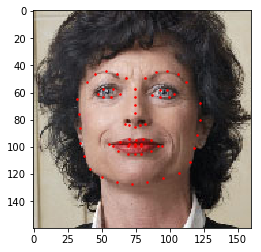

In [155]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('faces/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для собственного класса датасета нужно отнаследоваться от класса Dataset и реализовать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент




In [156]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (324, 215, 3) (68, 2)
1 (500, 333, 3) (68, 2)
2 (250, 258, 3) (68, 2)
3 (434, 290, 3) (68, 2)


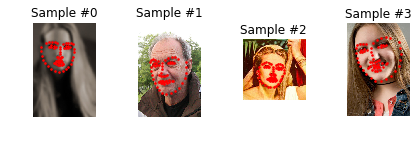

In [157]:
face_dataset = FaceLandmarksDataset(csv_file='faces/face_landmarks.csv',
                                    root_dir='faces/')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [158]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

Приведем изображение к 256x256 и вырежем случайную область 224x224

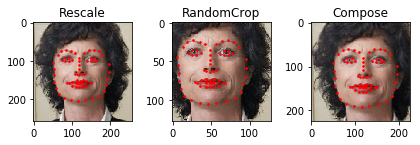

In [165]:
scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

## Итерирование по датасету

In [164]:
transformed_dataset = FaceLandmarksDataset(csv_file='faces/face_landmarks.csv',
                                           root_dir='faces/',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        show_landmarks(**tsfrm(sample))
        break

0 torch.Size([3, 224, 224]) torch.Size([68, 2])
1 torch.Size([3, 224, 224]) torch.Size([68, 2])
2 torch.Size([3, 224, 224]) torch.Size([68, 2])
3 torch.Size([3, 224, 224]) torch.Size([68, 2])


ValueError: Can not convert from object to float64.

Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


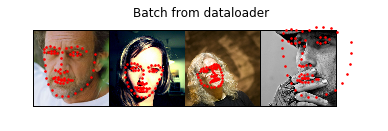

In [161]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break